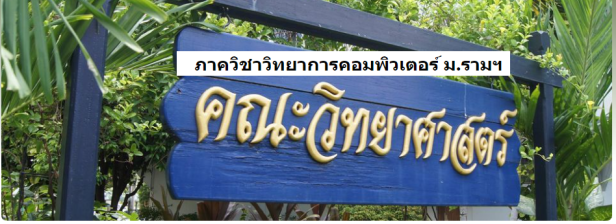

## Spatial Filtering

### Image Median filtering

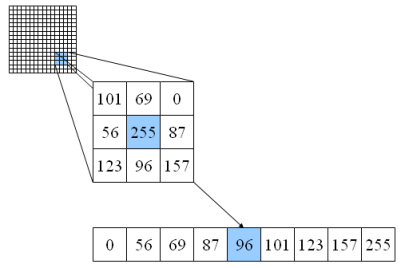

**Median filtering** is a common technique used in image processing to reduce noise. The basic idea is to replace each pixel's value with the median value of the intensities in the neighborhood of that pixel. This method is particularly effective at removing 'salt and pepper' noise from an image.

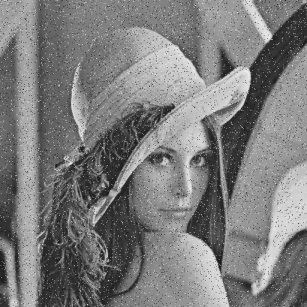  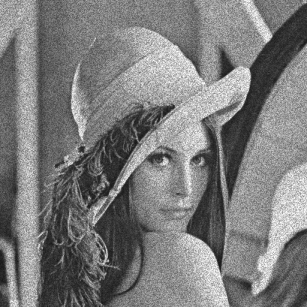

Here's a brief overview of how it works:

- **1. Neighborhood Definition:** First, a neighborhood around each pixel is defined. This is typically a square window centered on the pixel. The size of this window can vary, but common sizes are 3x3, 5x5, or 7x7 pixels.
- **2. Calculating the Median:** For each pixel, calculate the median of the pixel values in its neighborhood. This includes the pixel itself and its surrounding pixels within the window.
- **3. Replacing Pixel Values:** Replace the original pixel value with the calculated median value. This is done for every pixel in the image.


### Import Module

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Show Image Module

In [2]:
def plt_show(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
def cv_show(img):
    cv2.imshow('Mean Filtered Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

#### Method 1 using cv library

In [4]:
def MedianBlur(img, k):
    return cv2.medianBlur(img, 3)  

### 1. Read Image

In [5]:
image = cv2.imread('../images/lena_salt_512.png', 1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(type(gray), gray.shape)

<class 'numpy.ndarray'> (512, 512)


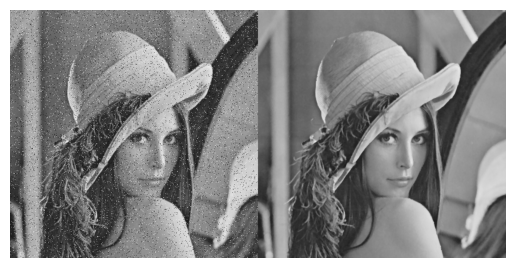

In [6]:
blur_img = cv2.medianBlur(gray, 3)   #MedianBlur(gray, 3)
imgs = cv2.hconcat([gray, blur_img])
plt_show(imgs)


In [7]:
def MedianCustom(img, sz):
    bd = int(sz / 2)
    inx = int(float(sz*sz)/2.0)
    (m,n) = img.shape
    out = np.zeros((m,n), dtype = 'float16')
    #out = img.copy()
    for i in range(bd,m-bd):
        for j in range(bd,n-bd):
            sub_img = img[i-bd:i+bd+1, j-bd:j+bd+1]
            asort = np.sort(np.ravel(sub_img))
            out[i,j] = asort[inx]    
    return out.astype(np.uint8)

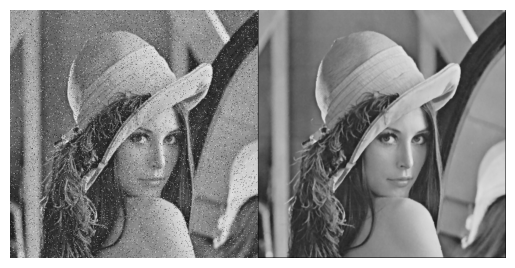

In [8]:
blur_img = MedianCustom(gray, 3)
imgs = cv2.hconcat([gray, blur_img])
plt_show(imgs)